/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


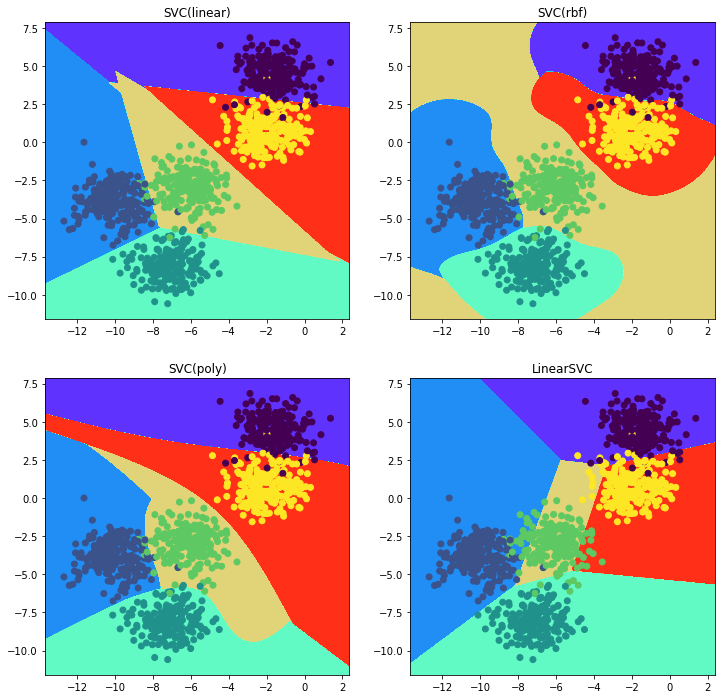

In [2]:
%matplotlib inline

from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy

num_of_blobs = 5
x, y = make_blobs(1000, centers=num_of_blobs, random_state=1)

x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1

grid_step = 0.02
grid_x_positions = numpy.arange(x_min, x_max, grid_step)
grid_y_positions = numpy.arange(y_min, y_max, grid_step)
grid_x, grid_y = numpy.meshgrid(grid_x_positions, grid_y_positions)
grid = numpy.c_[grid_x.ravel(), grid_y.ravel()]

svcs = {
    'SVC(linear)': SVC(kernel='linear'),
    'SVC(rbf)': SVC(kernel='rbf', gamma='auto'),
    'SVC(poly)': SVC(kernel='poly', gamma='auto'),
    'LinearSVC': LinearSVC()
}

plt.figure(figsize=(12, 12))

i = 0
for name, svc in svcs.items():
    svc = svc.fit(x, y)
    predictions = svc.predict(grid)
    predictions = predictions.reshape(grid_x.shape)
    plt.subplot(2, 2, i + 1)
    plt.title(name)
    plt.contourf(grid_x_positions, grid_y_positions, predictions, cmap=plt.cm.rainbow)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    i = i + 1

plt.show()